In [166]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt

import datetime
from datetime import datetime, date, time

import time

In [176]:

filename_HRV = 'S5/20190129_160827_RecCSVFile/RecCSVFile_20190129_160827_resampler_9_output_1.csv'
filename_pupleft = 'S5/20190129_160827_RecCSVFile/RecCSVFile_20190129_160827_resampler_9_output_2.csv'
filename_pupright = 'S5/20190129_160827_RecCSVFile/RecCSVFile_20190129_160827_resampler_9_output_3.csv'

files = [filename_HRV, filename_pupleft, filename_pupright]

for filename in files: 
    
    file = pd.read_csv(filename, sep = ';')
    

    file['Timestamp'] = file[file.columns[0]] 
    
    if filename == filename_HRV: 
        file['HRV'] = file[file.columns[1]] 
        file.index = np.arange(1,len(file)+1)
        for i in range(1,len(file), 50): 
            V.append(i)
        for i in file.index: 
            if i not in V : 
                file = file.drop(i,0)
            
            
        mask = file['HRV']==-1
        file = file[~mask]
        
 
        mean = file['HRV'].mean()
        standard_dev = file['HRV'].std()
        
        L = [mean, standard_dev]
        HRV_clean = file
        
        
  
        
    elif filename == filename_pupleft : 
        file['Diam Occ Left'] = file[file.columns[1]] 
        mask = file['Diam Occ Left'] ==0
        file = file[~mask] 
        mean = file['Diam Occ Left'].mean()
        standard_dev = file['Diam Occ Left'].std()
        
        M = [mean, standard_dev]
        
        Diam_Left_clean = file

            
    else : 
        file['Diam Occ Right'] = file[file.columns[1]] 
        mask = file['Diam Occ Right'] ==0
        file = file[~mask] 
        mean = file['Diam Occ Right'].mean()
        standard_dev = file['Diam Occ Right'].std()
        
        N = [mean, standard_dev]
        Diam_Right_clean = file
 
        
final = pd.DataFrame([L, M, N],columns = ['Mean', 'Standard Deviation'] , index = ['HRV', 'Diam Occ Left', 'Diam Occ Right'])
    

In [168]:
final.to_csv('Mean-Std-data.csv')

In [177]:
final

,Mean,Standard Deviation
HRV,67.815789,7.510133
Diam Occ Left,0.004775,0.000727
Diam Occ Right,0.004679,0.000620


In [ ]:
#centrée réduite


In [179]:
HRV_clean['HRV centré'] = (HRV_clean['HRV'] -final['Mean']['HRV'])/final['Standard Deviation']['HRV']

Diam_Right_clean['Diam Occ Right centré'] = (Diam_Right_clean['Diam Occ Right'] -final['Mean']['Diam Occ Right'])/final['Standard Deviation']['Diam Occ Right']
Diam_Left_clean['Diam Occ Left centré'] = (Diam_Left_clean['Diam Occ Left'] -final['Mean']['Diam Occ Left'])/final['Standard Deviation']['Diam Occ Left']

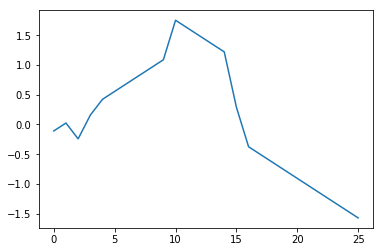

In [191]:
plt.plot(HRV_clean['HRV centré'].unique())

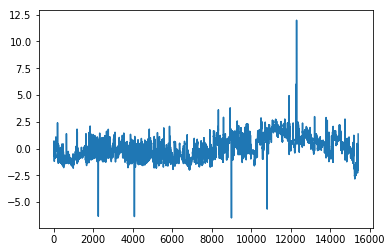

In [194]:
plt.plot(Diam_Left_clean['Diam Occ Left centré'].unique())